In [282]:
import numpy as np

def KLdivergence(x, y):
    """Compute the Kullback-Leibler divergence between two multivariate samples.

    Parameters
    ----------
    x : 2D array (n,d)
      Samples from distribution P, which typically represents the true
      distribution.
    y : 2D array (m,d)
      Samples from distribution Q, which typically represents the approximate
      distribution.

    Returns
    -------
    out : float
      The estimated Kullback-Leibler divergence D(P||Q).

    References
    ----------
    Pérez-Cruz, F. Kullback-Leibler divergence estimation of
continuous distributions IEEE International Symposium on Information
Theory, 2008.
    """
    from scipy.spatial import cKDTree as KDTree

    # Check the dimensions are consistent
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)

    n,d = x.shape
    m,dy = y.shape

    assert(d == dy)


    # Build a KD tree representation of the samples and find the nearest neighbour
    # of each point in x.
    xtree = KDTree(x)
    ytree = KDTree(y)

    # Get the first two nearest neighbours for x, since the closest one is the
    # sample itself.
    r = xtree.query(x, k=2, eps=.01, p=2)[0][:,1]
    s = ytree.query(x, k=1, eps=.01, p=2)[0]
    r[r==0]=0.000001
    s[s==0]=0.000001
    # on the first term of the right hand side.
    return -np.log(r/s).sum() * d / n + np.log(m / (n - 1.))

In [219]:
#####################################################Regression#######################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def dataProvider(file,windowsize,stepsize,threshold):  
    dataframe=pd.read_csv(file,header=0)    
    np_array=np.array(dataframe)
    inputs, targets=np_array[:, 0], np_array[:, 1]
    offset = int(0.5 * (windowsize - 1.0))
#     window_num=inputs.size - 2 * offset
    features=list()
    labels=list()
    i=0
    while (i<=inputs.size-windowsize):
        data_in=inputs[i:i+windowsize]
        tar=targets[i+offset]
        features.append(data_in)
        labels.append(tar)
        i=i+stepsize
    X=np.array(features)
    Y=np.array(labels)
    Y[Y<=threshold] = 0
    # scaler = MinMaxScaler()
    # X=scaler.fit_transform(X)
    x_train_all, X, y_train_all, Y = train_test_split(X, Y, test_size=0.2,random_state=100)
    return X,Y

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
def Aggdata(file,threshold):  
    dataframe=pd.read_csv(file,header=0)    
    np_array=np.array(dataframe)
    inputs, targets=np_array[:, 0], np_array[:, 1]
    targets[targets<=threshold]=0
#     targets[targets>threshold1]=0
    return inputs,targets

In [310]:
trainfile1="F:/NILM/training_data/fridge_test_.csv"
trainfile2="F:/NILM/training_data/fridge_house_2_training_.csv"
trainfile3="F:/NILM/ukdale_training/fridge_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/fridge_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/fridge/fridge_house_2_training_.csv"
trainfile6="F:/NILM/refit_training/fridge/fridge_house_15_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
stepsizeList=[2,2,16,16,16,16]
data_insts, data_labels, num_insts,on = [], [], [],[]
threshold=50
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19, stepsizeList[i], threshold)
#     Y=Y.reshape(-1,1)
    X_on=X[Y>0]
    data_insts.append(X_on)
    num_insts.append(X_on.shape[0])
# min_size=min(num_insts)
# x_tem, y_tem=[],[]
# for j in range(len(fileList)):
#   ridx = np.random.choice(num_insts[j], min_size)
#   x_tem.append(data_insts[j][ridx, :])
#   num_insts[j]=x_tem[j].shape[0]
# data_insts=x_tem
# print(num_insts)

In [283]:
from scipy.special import rel_entr
for i in [1,2,5]:
    for j in range(6):
        if j!=i:
            kl_pq = KLdivergence(data_insts[i], data_insts[j])
            print(kl_pq)
    print("finish target house:", i)

166.40318333502663
176.57427391543044
183.94715689100548
180.0990922764981
178.35498001432674
finish target house: 1
38.65442150153472
34.136737335400476
23.3792428688165
21.919917485613887
22.51264019196688
finish target house: 2
98.38159074538852
93.3690324245452
65.58269277321577
61.21987675429084
56.19644971543641
finish target house: 5


In [311]:
from scipy.special import rel_entr
for i in [1,2,5]:
    for j in range(6):
        if j!=i:
            kl_pq = KLdivergence(data_insts[i], data_insts[j])
            print(kl_pq)
    print("finish target house:", i)

15.415034809950278
23.72214530651049
32.79654802835539
26.222185194743826
25.515749184760665
finish target house: 1
21.754957465363624
16.960183587733322
5.978791845088534
3.659118362906525
4.417187188366949
finish target house: 2
46.1560076450796
40.39019514896048
10.548114579471859
8.135674747322765
2.613863997035164
finish target house: 5


In [330]:
trainfile1="F:/NILM/training_data/washingmachine_test_.csv"
trainfile2="F:/NILM/training_data/washingmachine_house_3_training_.csv"
trainfile3="F:/NILM/ukdale_training/washingmachine_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/washingmachine_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/washingmachine/washingmachine_house_9_training_.csv"
trainfile6="F:/NILM/refit_training/washingmachine/washingmachine_house_15_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
stepsizeList=[2,2,16,16,16,16]
data_insts, data_labels, num_insts,on = [], [], [],[]
threshold=20
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19, stepsizeList[i], threshold)
#     Y=Y.reshape(-1,1)
    X_on=X[Y>0]
    data_insts.append(X_on)
    num_insts.append(X_on.shape[0])
# min_size=min(num_insts)
# x_tem, y_tem=[],[]
# for j in range(len(fileList)):
#   ridx = np.random.choice(num_insts[j], min_size)
#   x_tem.append(data_insts[j][ridx, :])
#   num_insts[j]=x_tem[j].shape[0]
# data_insts=x_tem
# print(num_insts)


In [329]:
from scipy.special import rel_entr
for i in [0,2,5]:
    for j in range(6):
        if j!=i:
            kl_pq = KLdivergence(data_insts[i], data_insts[j])
            print(kl_pq)
    print("finish target house:", i)

244.3877916403603
270.3933935609186
274.07590493511907
260.21045166471947
261.5112684048398
finish target house: 0
65.19633399113575
59.32013107211003
14.203262507583117
11.33554631622295
10.771930410318602
finish target house: 2
116.56131377310304
110.35912842249404
60.915246761656554
64.80533567312479
62.387954249074795
finish target house: 5


In [331]:
from scipy.special import rel_entr
for i in [0,2,5]:
    for j in range(6):
        if j!=i:
            kl_pq = KLdivergence(data_insts[i], data_insts[j])
            print(kl_pq)
    print("finish target house:", i)

17.46244267808677
31.858159476351265
48.19630673389472
26.307450037260825
34.36900955203856
finish target house: 0
61.571247893147294
55.221067597193475
10.449693788421463
6.35285799047411
5.812353831903271
finish target house: 2
61.223778934081544
55.01732859516082
2.833398647505657
8.428031712470869
4.057002499728066
finish target house: 5


In [324]:
trainfile1="F:/NILM/training_data/dishwasher_test_.csv"
trainfile2="F:/NILM/training_data/dishwasher_house_2_training_.csv"
trainfile3="F:/NILM/ukdale_training/dishwasher_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/dishwasher_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile6="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
data_insts, data_labels, num_insts,on = [], [], [],[]
threshold=10
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19, stepsizeList[i], threshold)
#     Y=Y.reshape(-1,1)
    X_on=X[Y>0]
    data_insts.append(X_on)
    num_insts.append(X_on.shape[0])
# min_size=min(num_insts)
# x_tem, y_tem=[],[]
# for j in range(len(fileList)):
#   ridx = np.random.choice(num_insts[j], min_size)
#   x_tem.append(data_insts[j][ridx, :])
#   num_insts[j]=x_tem[j].shape[0]
# data_insts=x_tem
print(num_insts)

[752, 187, 5513, 502, 1025, 957]


In [325]:
from scipy.special import rel_entr
for i in [0,2,4]:
    for j in range(6):
        if j!=i:
            kl_pq = KLdivergence(data_insts[i], data_insts[j])
            print(kl_pq)
    print("finish target house:", i)

22.67415925813103
35.18048776108499
40.4415962163619
30.98945647388389
23.077540942658842
finish target house: 0
30.794544415621832
40.63324413545042
17.09564912852023
9.758842617104403
22.944288542071842
finish target house: 2
38.582042431622796
48.15651746097504
4.423296010602451
12.233556496389001
28.313751551968725
finish target house: 4


In [335]:
trainfile1="F:/NILM/training_data/microwave_test_.csv"
trainfile2="F:/NILM/training_data/microwave_house_2_training_.csv"
trainfile3="F:/NILM/ukdale_training/microwave_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/microwave_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile6="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
stepsizeList=[2,1,16,16,16,16]
data_insts, data_labels, num_insts,on = [], [], [],[]
threshold=200
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19, stepsizeList[i], threshold)
#     Y=Y.reshape(-1,1)
    X_on=X
    data_insts.append(X_on)
    num_insts.append(X_on.shape[0])
# min_size=min(num_insts)
# x_tem, y_tem=[],[]
# for j in range(len(fileList)):
#   ridx = np.random.choice(num_insts[j], min_size)
#   x_tem.append(data_insts[j][ridx, :])
#   num_insts[j]=x_tem[j].shape[0]
# data_insts=x_tem
# print(num_insts)

In [336]:
from scipy.special import rel_entr
for i in [0,3,5]:
    for j in range(6):
        if j!=i:
            kl_pq = KLdivergence(data_insts[i], data_insts[j])
            print(kl_pq)
    print("finish target house:", i)

24.571864055478642
24.91820637467816
27.631191338522893
27.19329468723788
13.171383440999186
finish target house: 0
4.476610602395589
23.732593277517854
3.3832106071894725
7.834875059162877
0.27370767362862125
finish target house: 3
16.34348271911641
27.641570674455206
21.02647528951969
18.776607018690118
23.25316328817542
finish target house: 5


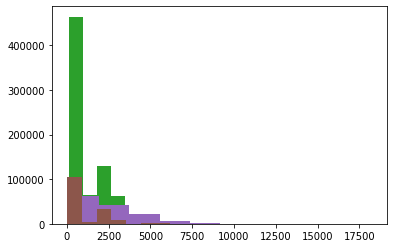

In [215]:
trainfile1="F:/NILM/training_data/washingmachine_test_.csv"
trainfile2="F:/NILM/training_data/washingmachine_house_3_training_.csv"
trainfile3="F:/NILM/ukdale_training/washingmachine_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/washingmachine_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/washingmachine/washingmachine_house_9_training_.csv"
trainfile6="F:/NILM/refit_training/washingmachine/washingmachine_house_15_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
threshold=20
a=0
data_x=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    a=plt.hist(X_on,bins=10,label='Aggregate')
#     plt.hist(Y_on,bins='auto',label='Fridge')
    data_x.append(a[0])

In [127]:
from scipy.special import rel_entr
for i in [0,2,4]:
    for j in range(6):
        if j!=i:
            kl_pq = scipy.stats.entropy(data_x[i], data_x[j])
            print(kl_pq)
    print("finish target house:", i)


2.4694144093700205
3.8441544241192265
3.0722107358372637
3.759651014258139
3.8309153553376007
finish target house: 0
3.659967432811475
3.6130185557614753
0.23334246958320126
0.17197876186596445
0.07434696848772396
finish target house: 2
3.4312758028731123
3.4816011189086953
0.22774110107773368
0.46536953272296827
0.6151895805082013
finish target house: 4


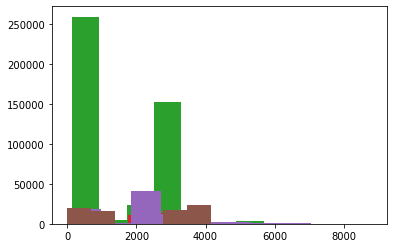

In [116]:
trainfile1="F:/NILM/training_data/dishwasher_house_3_training_.csv"
trainfile2="F:/NILM/training_data/dishwasher_house_2_training_.csv"
trainfile3="F:/NILM/ukdale_training/dishwasher_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/dishwasher_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile6="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
threshold=10
data_x=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    a=plt.hist(X_on,bins=10,label='Aggregate')
#     plt.hist(Y_on,bins='auto',label='Fridge')
    data_x.append(a[0])

In [117]:
from scipy.special import rel_entr
for i in [0,2,4]:
    for j in range(6):
        if j!=i:
            kl_pq = scipy.stats.entropy(data_x[i], data_x[j])
            print(kl_pq)
    print("finish target house:", i)

1.200665234287846
1.3282002131018715
1.5187292914381778
0.8561287084840643
2.2869285185622186
finish target house: 0
1.1267983463719409
1.8723902772278986
0.5832240476282641
0.663550586412456
2.244781929931584
finish target house: 2
0.6606931892609268
1.1500691097236093
1.0513994570651208
2.9335498488687444
3.3327153840485897
finish target house: 4


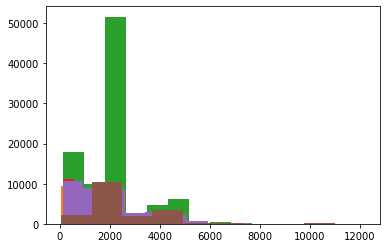

In [114]:
trainfile1="F:/NILM/training_data/microwave_test_.csv"
trainfile2="F:/NILM/training_data/microwave_house_2_training_.csv"
trainfile3="F:/NILM/ukdale_training/microwave_house_1_training_.csv"
trainfile4="F:/NILM/ukdale_training/microwave_house_2_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile6="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5,trainfile6]
threshold=10
a=0
data_x=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    a=plt.hist(X_on,bins=10,label='Aggregate')
#     plt.hist(Y_on,bins='auto',label='Fridge')
    data_x.append(a[0])

In [115]:
from scipy.special import rel_entr
for i in [0,3,5]:
    for j in range(6):
        if j!=i:
            kl_pq = scipy.stats.entropy(data_x[i], data_x[j])
            print(kl_pq)
    print("finish target house:", i)

0.42472322806747365
0.905072729441318
1.9548413865094347
0.31974247788630594
0.2010261998317342
finish target house: 0
1.1025487187091534
0.709255819144457
1.112293253395603
0.6423723598395722
1.0567267432352911
finish target house: 3
0.23351194572166084
0.8362366304024992
1.0625518853662086
1.7931380539577222
0.4364526492657898
finish target house: 5
